In [1]:
!pip install sqlalchemy

In [1]:
#import library yg dibutuhin
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import seaborn as sns
from statsmodels.graphics import tsaplots
from sqlalchemy import create_engine
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
abc = create_engine('sqlite:///tes lain.db').connect()
data = pd.read_sql_table('afif' , abc)
data

,Tahun,Penjualan
0,1,200
1,2,240
2,3,255
3,4,50
4,5,60
5,6,120
6,7,125
7,8,134
8,9,115
9,10,90


In [3]:
x = data["Tahun"]
y = data["Penjualan"]


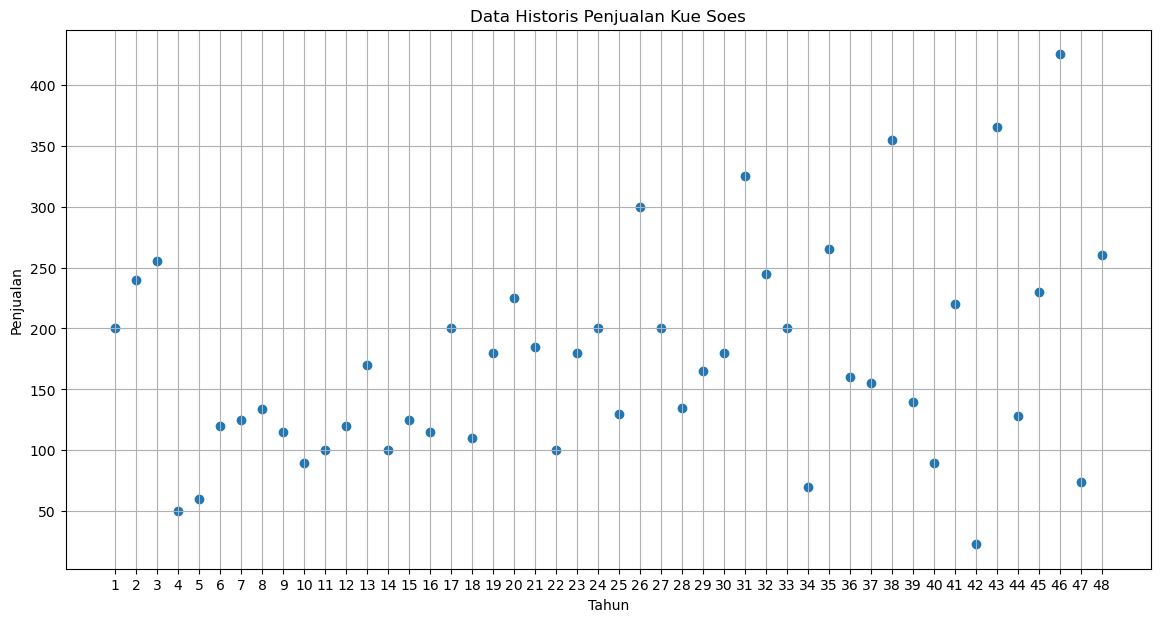

In [31]:
plt.figure(figsize=(14,7))
plt.scatter(x, y)
plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.title('Data Historis Penjualan Kue Soes')
plt.grid(True)

In [5]:
#test perthitungan polinomial
poly = PolynomialFeatures(degree=8, include_bias=False)
poly_features = poly.fit_transform(x.values.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)


print(poly_reg_model.intercept_, poly_reg_model.coef_)

246.1796390727201 [-6.74037810e+00 -1.20549499e+01  2.59008676e+00 -2.27727962e-01
  1.05230033e-02 -2.67576959e-04  3.53619253e-06 -1.89561284e-08]


In [6]:
y_predicted = poly_reg_model.predict(poly_features)
y_predicted

array([229.75692881, 201.87618888, 171.31996861, 143.54237713,
       121.50722481, 106.38334603,  98.11225065,  95.86248712,
        98.38433594, 104.27768799, 112.18519757, 120.92203615,
       129.55280808, 137.42542561, 144.17097588, 149.67784849,
       154.04762783, 157.53949009, 160.50908053, 163.34708227,
       166.4219236 , 170.03030642, 174.35847422, 179.45637353,
       185.22609872, 191.42524535, 197.68503338, 203.5422969 ,
       208.48367287, 211.99955707, 213.64463115, 213.10100017,
       210.23921611, 205.17169798, 198.29229542, 190.29497791,
       182.16386757, 175.12606943, 170.55798825, 169.8350572 ,
       174.11403894, 184.03629571, 199.3396604 , 218.36577656,
       237.44901068, 250.17227606, 246.47434316, 211.59244681])

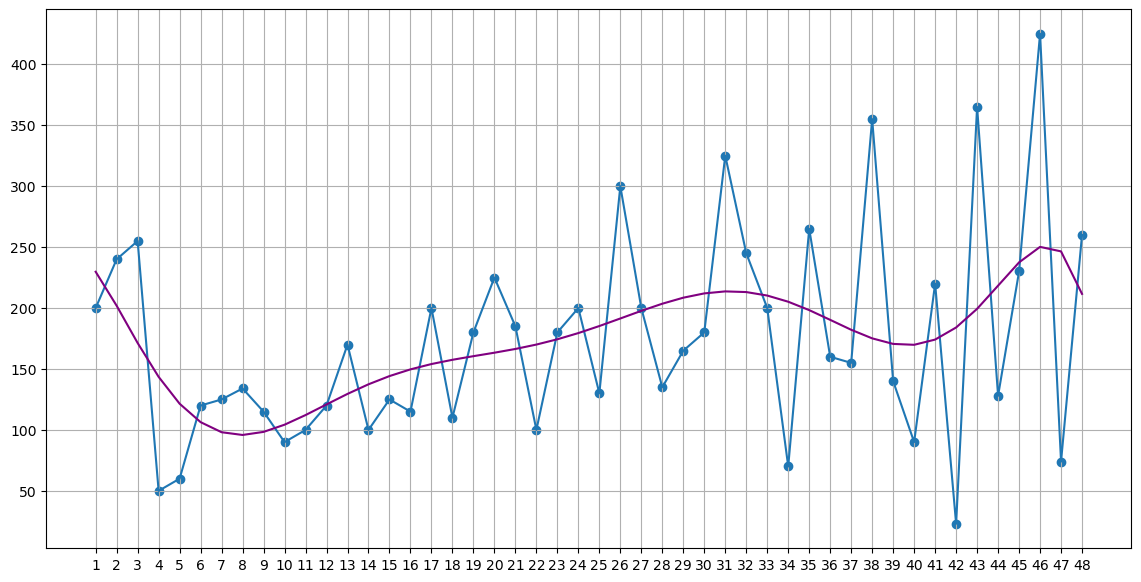

In [7]:
plt.figure(figsize=(14,7))
plt.scatter(x, y)

#lebih prefer 1 s/d 48 daripada tahun-bulan
#add line to show fitted polynomial regression model
plt.plot(x, y)
plt.plot(x, y_predicted, color='purple')
plt.grid(True)

In [8]:
poly_reg_model.predict(poly.fit_transform([[48]]))

array([211.59244681])

In [9]:
poly_reg_model.predict(poly.fit_transform([[49]]))

array([124.82323684])

In [10]:
poly_reg_model.predict(poly.transform([[50]]))

array([-41.91564628])

In [11]:
poly_reg_model.predict(poly.fit_transform([[51]]))

array([-325.74185281])

In [12]:
poly_reg_model.predict(poly.fit_transform([[52]]))

array([-774.70170907])

In [13]:
poly_reg_model.predict(poly.fit_transform([[53]]))

array([-1449.92071757])

In [14]:
poly_reg_model.predict(poly.fit_transform([[54]]))

array([-2428.03194729])

In [15]:
poly_reg_model.predict(poly.fit_transform([[55]]))

array([-3803.90385369])

In [16]:
poly_reg_model.predict(poly.fit_transform([[56]]))

array([-5693.68983245])

In [17]:
poly_reg_model.predict(poly.fit_transform([[57]]))

array([-8238.22257504])

In [18]:
poly_reg_model.predict(poly.fit_transform([[58]]))

array([-11606.77705879])

In [19]:
poly_reg_model.predict(poly.fit_transform([[59]]))

array([-16001.22676831])

In [20]:
poly_reg_model.predict(poly.fit_transform([[60]]))

array([-21660.61850925])

In [21]:
#untuk 12 bulan kedepan
n= int(len(y_predicted)*0.5)
test_data= (y_predicted)[n:]
print(test_data)
print(len(test_data))

[185.22609872 191.42524535 197.68503338 203.5422969  208.48367287
 211.99955707 213.64463115 213.10100017 210.23921611 205.17169798
 198.29229542 190.29497791 182.16386757 175.12606943 170.55798825
 169.8350572  174.11403894 184.03629571 199.3396604  218.36577656
 237.44901068 250.17227606 246.47434316 211.59244681]
24


In [22]:
#Dari web https://www.geeksforgeeks.org/how-to-calculate-mean-absolute-error-in-python/
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
# calculate MAE % MSE
error1 = mae(y, y_predicted)
error2 = mse(y, y_predicted)
error3 = math.sqrt(mse(y, y_predicted))

# display
print("Mean Absolute Error : " + str(error1))
print("Mean Squared Error : " + str(error2))
print("Root Mean Squared Error : " + str(error3))

Mean Absolute Error : 56.869806483776735
Mean Squared Error : 5627.202371767977
Root Mean Squared Error : 75.01468104156663


In [23]:
#dari https://www.statology.org/autocorrelation-python/
#calculate autocorrelations
sm.tsa.acf(x)

array([1.        , 0.9375    , 0.87510855, 0.81293422, 0.75108554,
       0.68967108, 0.62879939, 0.56857903, 0.50911854, 0.45052649,
       0.39291142, 0.33638189, 0.28104646, 0.22701368, 0.1743921 ,
       0.12329027, 0.07381676])

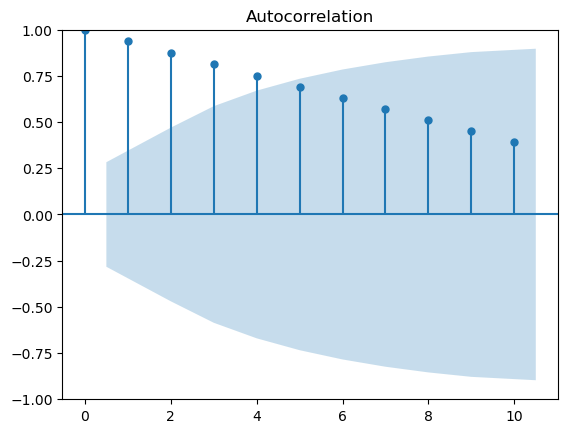

In [24]:
#dari https://www.statology.org/autocorrelation-python/


#plot autocorrelation function
fig = tsaplots.plot_acf(x, lags=10)
plt.show()

In [25]:
#untuk angka yg kosong boleh menjelaskan dengan mengisi sesuai perkiraan pakar
#tujuan skripsi saya mencari persamaan terkecil 
#setelah itu mencari 5 tes itu sampai semuanya layak
#lag plot
#baru mencari prediksi setahun kedepan


Text(0.5, 1.0, 'Lag Plot Kue Soes')

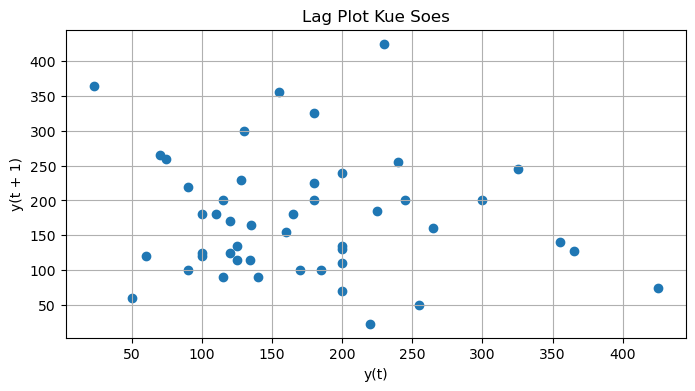

In [30]:
plt.figure(figsize=(8,4))
pd.plotting.lag_plot(y,lag=1)
plt.grid(True)
plt.title('Lag Plot Kue Soes')

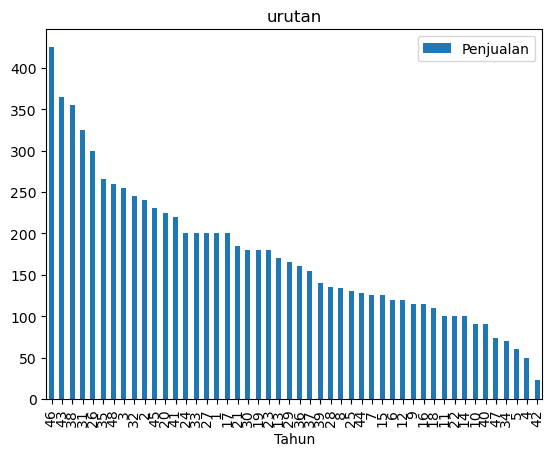

In [27]:
data= pd.DataFrame(data.groupby(['Tahun'])['Penjualan'].mean().sort_values(ascending = False))
data.plot.bar()
plt.title('urutan')
plt.show()


In [28]:
#https://www.statology.org/ols-regression-python/
from statsmodels.formula.api import ols
model = sm.OLS(y, x.astype(float)).fit()
#view model summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:              Penjualan   R-squared (uncentered):                   0.725
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              124.0
Date:                Mon, 31 Jul 2023   Prob (F-statistic):                    8.85e-15
Time:                        23:52:10   Log-Likelihood:                         -289.82
No. Observations:                  48   AIC:                                      581.6
Df Residuals:                      47   BIC:                                      583.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [29]:
from statsmodels.stats.diagnostic import het_breuschpagan
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(model.resid, model.model.exog)

print("Lagrange multiplier statistic: " + str(lm))
print("Lagrange multiplier p-value:   " + str(lm_pvalue))
print("F-statistic:                   " + str(fvalue))
print("P-value of F-statistic:        " + str(f_pvalue))

# If the p-value is less than the chosen significance level (e.g. 0.05), 
# reject the null hypothesis of homoscedasticity
if lm_pvalue < 0.05:
    print("Menolak H0. Terdeteksi Heteroskedastisitas.")
else:
    print("Terima H0. Tidak terdeteksi Heteroskedastisitas.")

Lagrange multiplier statistic: 12.15994100704253
Lagrange multiplier p-value:   nan
F-statistic:                   15.946324961220109
P-value of F-statistic:        0.00022756284198146768
Terima H0. Tidak terdeteksi Heteroskedastisitas.


In [30]:
r_square = poly_reg_model.score(poly_features,y)
r_square

0.2220849178067721

In [31]:
1/ (1-r_square)


1.28548735317052

In [32]:
import scipy.stats as stats

In [33]:
stats.jarque_bera(data)

Jarque_beraResult(statistic=6.059246454326549, pvalue=0.04833384557592357)

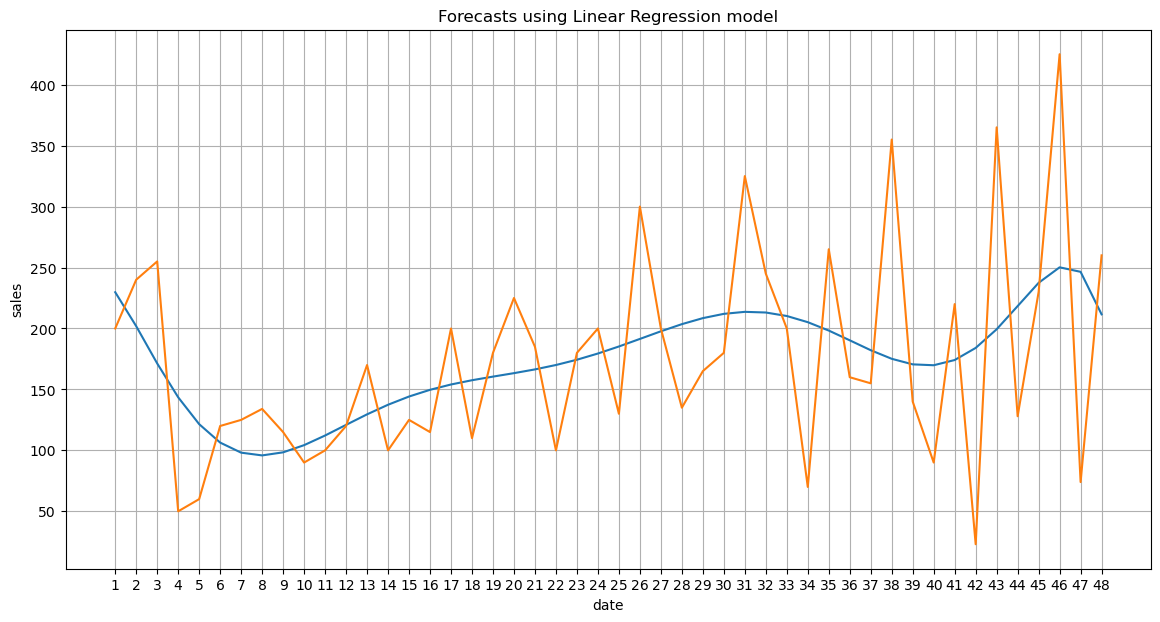

In [34]:
coba = y_predicted - y
fig = plt.figure(figsize=(14,7))
plt.plot(coba.index, y_predicted)
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Forecasts using Linear Regression model')

#lebih prefer 1 s/d 48 daripada tahun-bulan
#add line to show fitted polynomial regression model
plt.plot(x, y)
plt.grid(True)
plt.show()

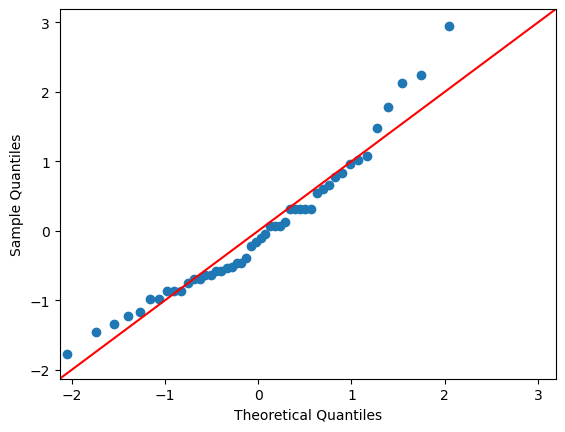

In [35]:
import pylab as py
sm.qqplot(data['Penjualan'], line='45', fit=True)
py.show()


In [36]:
from statsmodels.stats.stattools import durbin_watson
#perform Durbin-Watson test
durbin_watson(model.resid)



1.5488886160535278

Text(0.5, 1.08, 'Tes Linearitas Data Kue Soes')

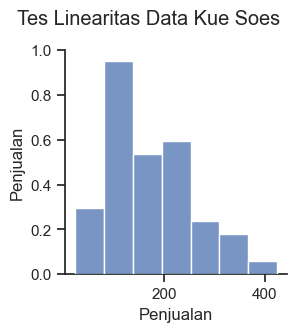

In [37]:
import seaborn as sns
sns.set(style='ticks', color_codes=True, font_scale=1)
LN=sns.pairplot(data, height=3, diag_kind='hist', kind='reg')
LN.fig.suptitle('Tes Linearitas Data Kue Soes', y=1.08)

C:\Users\Afif\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Homoscedasticity Data Kue Soes')

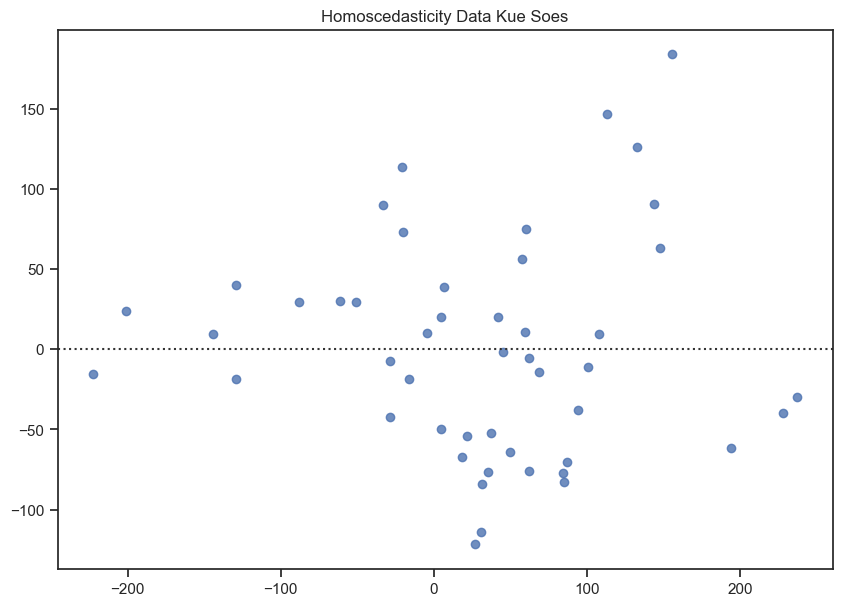

In [38]:
fig, ax=plt.subplots(figsize=(10,7))
pred_val=model.fittedvalues.copy()
true_val= y.values.copy()
resid=true_val-pred_val
res = sns.residplot(resid, pred_val)
plt.title('Homoscedasticity Data Kue Soes')

In [39]:
from scipy import stats

In [40]:
n= int(input('Jumlah Data: '))
for i in range(n):
    print('data ke', i+1)
    x.append(float(input()))
    
mean = np.mean(x)
std = np.std(x, ddof = 1)
kstest = stats.kstest(x, 'norm', args = (mean, std))
print("Statistik Uji Kolmogorov-Smirnov :", kstest.statistic)
print("p-value", kstest.pvalue)

Jumlah Data: 


ValueError: invalid literal for int() with base 10: ''

In [42]:
from numpy.random import seed
from numpy.random import poisson
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(data, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)